<a href="https://colab.research.google.com/github/JozefSL/pyNotes/blob/main/Prophet/neuralNetworkTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Install filterpy and restart runtime
# this command hides the cell output
%%capture
!pip install filterpy
import os
#os.kill(os.getpid(),9)

In [42]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [73]:
from google.colab import files
uploaded = files.upload() # Appalachia.xlsx

Saving oil_and_sp500.csv to oil_and_sp500.csv


In [33]:
# Load data
df = pd.read_csv('oil_prices.csv')

In [34]:
# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])


In [35]:
# Set date column as index
df.set_index('Date', inplace=True)

In [36]:
# Split data into training and testing sets
train_data = df[:int(len(df)*0.8)]
test_data = df[int(len(df)*0.8):]

In [37]:
# Scale data
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)


In [38]:
# Define time steps
time_steps = 3

# Create training and testing sets
def create_dataset(dataset, time_steps=1):
    X, Y = [], []
    for i in range(len(dataset)-time_steps-1):
        a = dataset[i:(i+time_steps), 0]
        X.append(a)
        Y.append(dataset[i + time_steps, 0])
    return np.array(X), np.array(Y)


In [39]:
X_train, Y_train = create_dataset(train_data, time_steps)
X_test, Y_test = create_dataset(test_data, time_steps)


In [40]:
# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [43]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [44]:
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')


In [45]:
# Train model
model.fit(X_train, Y_train, epochs=50, batch_size=32)

Epoch 1/50
236/236 [==============================] - 8s 5ms/step - loss: 0.0081
Epoch 2/50
236/236 [==============================] - 1s 6ms/step - loss: 1.6550e-04
Epoch 3/50
236/236 [==============================] - 1s 6ms/step - loss: 1.4595e-04
Epoch 4/50
236/236 [==============================] - 2s 7ms/step - loss: 1.5066e-04
Epoch 5/50
236/236 [==============================] - 3s 11ms/step - loss: 1.4403e-04
Epoch 6/50
236/236 [==============================] - 2s 11ms/step - loss: 1.4981e-04
Epoch 7/50
236/236 [==============================] - 2s 6ms/step - loss: 1.5258e-04
Epoch 8/50
236/236 [==============================] - 1s 5ms/step - loss: 1.5730e-04
Epoch 9/50
236/236 [==============================] - 1s 6ms/step - loss: 1.4429e-04
Epoch 10/50
236/236 [==============================] - 1s 6ms/step - loss: 1.5105e-04
Epoch 11/50
236/236 [==============================] - 1s 6ms/step - loss: 1.4504e-04
Epoch 12/50
236/236 [==============================] - 2s 8ms/ste

In [46]:
# Make predictions on test data
predicted_prices = model.predict(X_test)

59/59 [==============================] - 1s 3ms/step


In [47]:
# Invert scaling on test data and predictions
Y_test = scaler.inverse_transform(Y_test.reshape(-1,1))
predicted_prices = scaler.inverse_transform(predicted_prices)

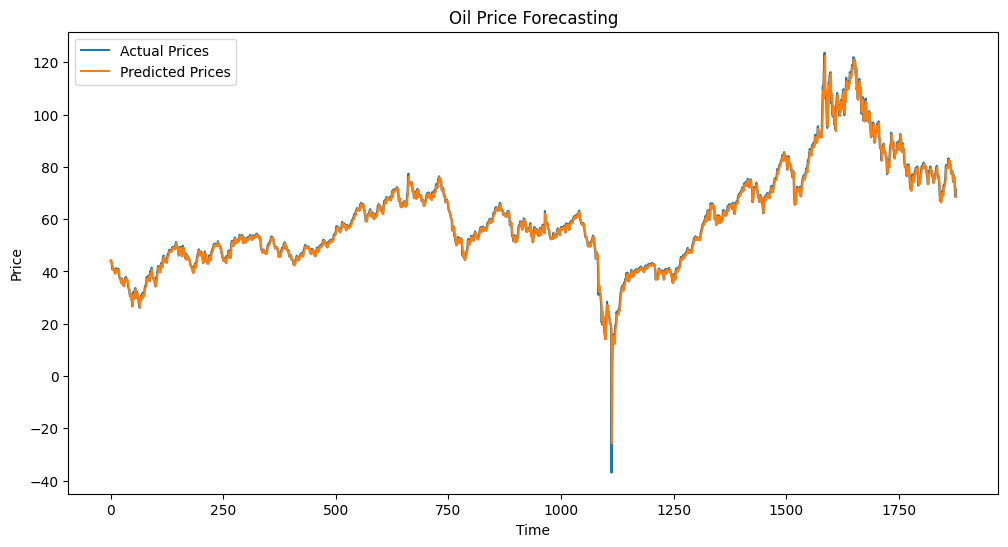

In [48]:
# Plot the actual and predicted prices
plt.figure(figsize=(12,6))
plt.plot(Y_test, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.title('Oil Price Forecasting')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
#Forecast 10 days

In [54]:
# Load data
df = pd.read_csv('oil_prices.csv')

# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set date column as index
df.set_index('Date', inplace=True)

# Scale data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

# Define time steps
time_steps = 3

# Create dataset
X, Y = [], []
for i in range(len(df_scaled)-time_steps-1):
    a = df_scaled[i:(i+time_steps), 0]
    X.append(a)
    Y.append(df_scaled[i + time_steps, 0])
X = np.array(X)
Y = np.array(Y)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(X, Y, epochs=50, batch_size=32)

# Forecast 10 days ahead
last_date = df.index[-1]
forecast_dates = pd.date_range(last_date, periods=11, freq='D')[1:]
last_values = df_scaled[-3:, 0]
forecast = []
for i in range(10):
    X = np.array(last_values)
    X = np.reshape(X, (1, time_steps, 1))
    predicted_price = model.predict(X)
    forecast.append(predicted_price[0][0])
    last_values = np.append(last_values[1:], predicted_price[0])

# Invert scaling on forecast
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1,1))


Epoch 1/50
294/294 [==============================] - 5s 5ms/step - loss: 0.0101
Epoch 2/50
294/294 [==============================] - 2s 6ms/step - loss: 1.6258e-04
Epoch 3/50
294/294 [==============================] - 3s 9ms/step - loss: 1.4637e-04
Epoch 4/50
294/294 [==============================] - 2s 6ms/step - loss: 1.2657e-04
Epoch 5/50
294/294 [==============================] - 2s 6ms/step - loss: 1.2117e-04
Epoch 6/50
294/294 [==============================] - 2s 5ms/step - loss: 1.1461e-04
Epoch 7/50
294/294 [==============================] - 2s 6ms/step - loss: 1.1482e-04
Epoch 8/50
294/294 [==============================] - 2s 6ms/step - loss: 1.1291e-04
Epoch 9/50
294/294 [==============================] - 2s 5ms/step - loss: 1.1671e-04
Epoch 10/50
294/294 [==============================] - 2s 8ms/step - loss: 1.1599e-04
Epoch 11/50
294/294 [==============================] - 2s 7ms/step - loss: 1.1735e-04
Epoch 12/50
294/294 [==============================] - 2s 6ms/step 

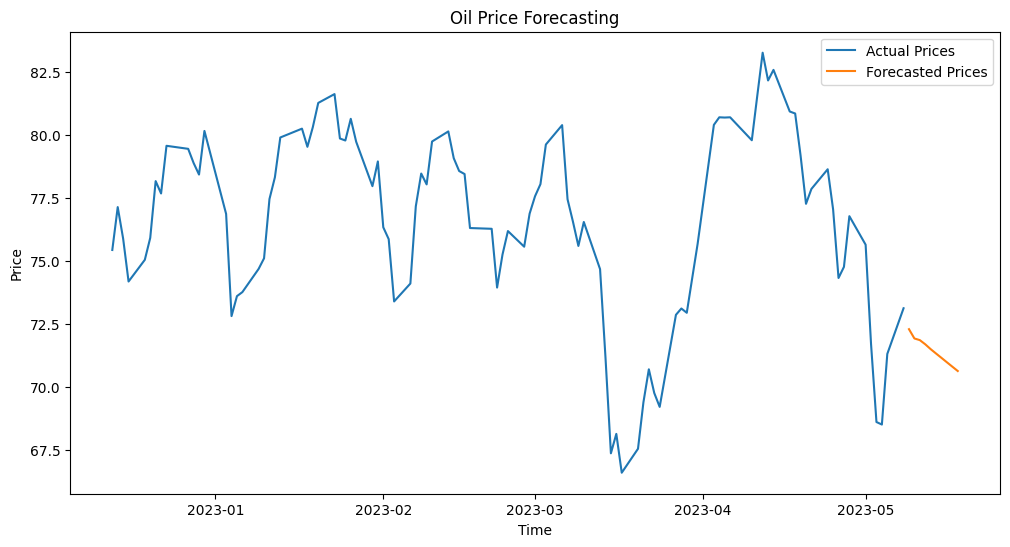

In [62]:
# Remove first element from forecast_dates to match the length of forecast
#forecast_dates = forecast_dates[1:]

# Plot the actual prices and the forecast
plt.figure(figsize=(12,6))
plt.plot(df.index[-100:], df[-100:], label='Actual Prices')
plt.plot(forecast_dates, forecast, label='Forecasted Prices')
plt.title('Oil Price Forecasting')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
#Further consideration:

In [75]:
#import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Load the dataset
df = pd.read_csv('oil_and_sp500.csv', parse_dates=['date'], index_col='date')

# Add new columns for past 2 days of oil prices and past 2 days of S&P 500 index values
#df['oil_lag1'] = df['oil_price'].shift(1)
#df['oil_lag2'] = df['oil_price'].shift(2)
#df['sp500_lag1'] = df['sp500_index'].shift(1)
#df['sp500_lag2'] = df['sp500_index'].shift(2)

# Remove missing values
df = df.dropna()

# Separate into train and test sets
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Scale the data
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

# Create input and output data
time_step = 1
X_train = []
y_train = []
for i in range(time_step, len(train_scaled)):
    X_train.append(np.concatenate((train_scaled[i-time_step:i, 0:2].flatten(), train_scaled[i-1, 2:4]), axis=None))
    y_train.append(train_scaled[i, 0])

X_test = []
y_test = []
for i in range(time_step, len(test_scaled)):
    X_test.append(np.concatenate((test_scaled[i-time_step:i, 0:2].flatten(), test_scaled[i-1, 2:4]), axis=None))
    y_test.append(test_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshape the input data
X_train = np.reshape(X_train, (X_train.shape[0], time_step, 4))
X_test = np.reshape(X_test, (X_test.shape[0], time_step, 4))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 4)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)



Epoch 1/50
236/236 [==============================] - 5s 4ms/step - loss: 0.0115
Epoch 2/50
236/236 [==============================] - 1s 4ms/step - loss: 2.0899e-04
Epoch 3/50
236/236 [==============================] - 1s 4ms/step - loss: 1.0886e-04
Epoch 4/50
236/236 [==============================] - 1s 4ms/step - loss: 6.5202e-05
Epoch 5/50
236/236 [==============================] - 1s 4ms/step - loss: 5.2701e-05
Epoch 6/50
236/236 [==============================] - 1s 4ms/step - loss: 5.0559e-05
Epoch 7/50
236/236 [==============================] - 1s 4ms/step - loss: 4.7807e-05
Epoch 8/50
236/236 [==============================] - 1s 4ms/step - loss: 4.7644e-05
Epoch 9/50
236/236 [==============================] - 1s 4ms/step - loss: 4.7715e-05
Epoch 10/50
236/236 [==============================] - 1s 5ms/step - loss: 4.5633e-05
Epoch 11/50
236/236 [==============================] - 1s 5ms/step - loss: 5.5988e-05
Epoch 12/50
236/236 [==============================] - 1s 5ms/step 

ValueError: ignored

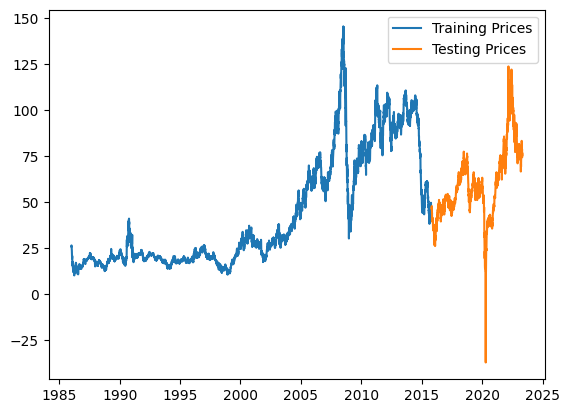

In [83]:
# Inverse transform the scaled data
#train_predictions = scaler.inverse_transform(np.concatenate((train_data.iloc[time_step:].values, train_predictions), axis=1))[:, -1]
#test_predictions = scaler.inverse_transform(np.concatenate((test_data.iloc[time_step:].values, test_predictions), axis=1))[:, -1]

# Plot the results
import matplotlib.pyplot as plt

train_dates = train_data.index[time_step:]
test_dates = test_data.index[time_step:]
forecast_dates = pd.date_range(start=test_dates[-1], periods=10, freq='D')[1:]

plt.plot(train_dates, train_data['oil_price_lag1'][time_step:], label='Training Prices')
plt.plot(test_dates, test_data['oil_price_lag1'][time_step:], label='Testing Prices')
plt.legend()
plt.show()

In [82]:
train_data

,oil_price_lag1,oil_price_lag2,sp500_index,sp500_index.1
date,,,,
1986-01-02,25.56,26.53,31414007.15,25587.06090
1986-01-03,26.00,25.85,31415099.59,26029.25507
1986-01-06,26.53,25.87,31418026.53,26540.59836
1986-01-07,25.85,26.03,31419013.76,25900.10671
1986-01-08,25.87,25.65,31420011.11,25907.07732
...,...,...,...,...
2015-10-22,44.90,43.19,42299085.90,44993.48414
2015-10-23,43.91,43.21,42300061.95,43980.41033
2015-10-26,43.19,45.93,42303027.06,43259.53020


In [79]:
test_predictions

array([[0.2689057 ],
       [0.2773541 ],
       [0.26992947],
       ...,
       [0.48724565],
       [0.48484886],
       [0.478386  ]], dtype=float32)

In [72]:
# Load data
data = pd.read_csv('oil_and_sp500.csv', parse_dates=['date'], index_col='date')

# Define input parameters
n_steps = 3  # number of time steps used for prediction
n_features = 4  # number of input variables (oil price, stock market index, dollar value, and lagged oil price)

# Prepare data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
n_samples = data.shape[0] - n_steps + 1  # total number of data points after applying time steps
n_samples = n_samples - n_samples % n_steps  # truncate to nearest multiple of n_steps
data = data[:n_samples]  # truncate data to match n_samples
X = np.zeros((n_samples, n_steps, n_features))  # initialize input array
for i in range(n_steps):
    X[:, i, :n_features-1] = data[i:i+n_samples, :n_features-1]  # add input variables
    X[:, i, n_features-1] = data[i-1:i-1+n_samples, 0]  # add lagged oil price

# Predict future prices
forecast = model.predict(X)
forecast = scaler.inverse_transform(forecast)

# Plot results
forecast_dates = np.arange(data.shape[0], data.shape[0]+n_samples)
plt.plot(forecast_dates[:n_samples-n_steps+1], data[n_steps-1:, 0], label='Actual Prices')
plt.plot(forecast_dates[n_samples-n_steps+1:], forecast[:, 0], label='Forecasted Prices')
plt.legend()
plt.show()

ValueError: ignored